# CIS 545 Group Project

Group members: Muizz Mullani (ID #12657249
), Raheel Bhimani (ID #83805554), Jesús Peña (ID #85378431)

---



# Section 1: Installing and Importing Libraries

In [1]:
from google.colab import drive

!pip3 install boto3
!pip install pandasql

     |████████████████████████████████| 131 kB 5.5 MB/s 
     |████████████████████████████████| 8.4 MB 37.5 MB/s 
     |████████████████████████████████| 79 kB 5.8 MB/s 
     |████████████████████████████████| 138 kB 36.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=1d75bb187a1744a1bec673caca2e51d71258809e1f8b135f46d15b02bf92123c
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654

In [2]:
import numpy as np 
import json
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import pandasql as ps #SQL on Pandas Dataframe
from pandasql import sqldf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
0 upgraded, 7 newly installed, 0 to remove and 37 not upgraded.
Need to get 349 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.2 [54.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.2 [37.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkadm5srv-mit11 amd64 1.16-2ubuntu0.2 [49.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkadm5

In [4]:
!apt update
!apt install gcc python-dev libkrb5-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('mcit545-final_project').getOrCreate()

# Section 2: Importing Raw Data Files and Processing

Sources: 

*   https://ourworldindata.org/crop-yields#licence
*   https://www.kaggle.com/noaa/noaa-global-surface-summary-of-the-day
*   https://ourworldindata.org/co2-emissions

---






In [6]:
from pyspark import SparkFiles

url_country_codes = 'https://raw.githubusercontent.com/jesuspena91/mcit545_final_project/main/country_codes.csv'
url_crop = 'https://raw.githubusercontent.com/jesuspena91/mcit545_final_project/main/crop_output_data.csv'
url_co2 = 'https://raw.githubusercontent.com/jesuspena91/mcit545_final_project/main/annual-co2-emissions-per-country.csv'

country_codes_df = pd.read_csv(url_country_codes).dropna()
raw_crops_df = pd.read_csv(url_crop)
raw_co2_emissions_df = pd.read_csv(url_co2)

raw_crops_df

,Entity,Year,barley_attainable,cassava_attainable,cotton_attainable,groundnut_attainable,maize_attainable,millet_attainable,oilpalm_attainable,potato_attainable,rapeseed_attainable,rice_attainable,rye_attainable,sorghum_attainable,soybean_attainable,sugarbeet_attainable,sugarcane_attainable,sunflower_attainable,wheat_attainable,wheat_yield_gap,barley_yield_gap,rye_yield_gap,millet_yield_gap,sorghum_yield_gap,maize_yield_gap,cassava_yield_gap,soybeans_yield_gap,rapeseed_yield_gap,sugarbeet_yield_gap,sugarcane_yield_gap,potato_yield_gap,oilpalm_yield_gap,groundnut_yield_gap,rice_yield_gap,sunflower_yield_gap,cotton_yield_gap
0,Afghanistan,1961,3.29,0.00,3.36,4.71,10.40,1.98,0.0,45.81,1.56,9.36,3.49,4.45,2.71,78.01,0.00,1.85,4.00,2.98,2.21,NaN,1.17,NaN,9.00,NaN,NaN,NaN,66.02,0.00,37.14,NaN,NaN,7.84,0.40,2.68
1,Afghanistan,1962,3.29,0.00,3.36,4.71,10.40,1.98,0.0,45.81,1.56,9.36,3.49,4.45,2.71,78.01,0.00,1.85,4.00,3.03,2.21,NaN,1.16,NaN,9.00,NaN,NaN,NaN,61.22,0.00,38.14,NaN,NaN,7.84,0.31,2.48
2,Afghanistan,1963,3.29,0.00,3.36,4.71,10.40,1.98,0.0,45.81,1.56,9.36,3.49,4.45,2.71,78.01,0.00,1.85,4.00,3.17,2.21,NaN,1.16,NaN,8.97,NaN,NaN,NaN,62.39,0.00,37.68,NaN,NaN,7.84,0.31,2.43
3,Afghanistan,1964,3.29,0.00,3.36,4.71,10.40,1.98,0.0,45.81,1.56,9.36,3.49,4.45,2.71,78.01,0.00,1.85,4.00,3.05,2.20,NaN,1.15,NaN,8.97,NaN,NaN,NaN,69.15,0.00,37.21,NaN,NaN,7.63,0.31,2.70
4,Afghanistan,1965,3.29,0.00,3.36,4.71,10.40,1.98,0.0,45.81,1.56,9.36,3.49,4.45,2.71,78.01,0.00,1.85,4.00,3.03,2.20,NaN,1.14,NaN,8.96,NaN,NaN,NaN,64.01,0.00,37.01,NaN,NaN,7.63,0.26,2.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8089,Zimbabwe,2014,2.79,14.12,3.83,3.13,5.06,1.99,0.0,28.40,0.00,8.22,0.00,4.24,2.42,0.00,109.85,1.75,4.65,2.44,0.00,NaN,1.67,3.78,4.13,9.49,1.24,NaN,NaN,20.43,11.63,NaN,2.72,5.95,1.31,3.26
8090,Zimbabwe,2015,2.79,14.12,3.83,3.13,5.06,1.99,0.0,28.40,0.00,8.22,0.00,4.24,2.42,0.00,109.85,1.75,4.65,2.60,0.00,NaN,1.87,4.00,4.48,9.44,1.47,NaN,NaN,32.16,11.46,NaN,2.79,5.95,1.37,3.45
8091,Zimbabwe,2016,2.79,14.12,3.83,3.13,5.06,1.99,0.0,28.40,0.00,8.22,0.00,4.24,2.42,0.00,109.85,1.75,4.65,2.75,0.00,NaN,1.82,4.05,4.62,9.41,1.22,NaN,NaN,29.78,11.40,NaN,2.88,5.95,1.36,3.51
8092,Zimbabwe,2017,2.79,14.12,3.83,3.13,5.06,1.99,0.0,28.40,0.00,8.22,0.00,4.24,2.42,0.00,109.85,1.75,4.65,2.90,0.00,NaN,1.54,3.52,4.50,9.38,0.91,NaN,NaN,29.81,11.35,NaN,2.66,5.95,1.24,3.22


In [7]:
raw_co2_emissions_df

,Entity,Code,Year,co2_emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256
...,...,...,...,...
23944,Zimbabwe,ZWE,2016,10737567
23945,Zimbabwe,ZWE,2017,9581633
23946,Zimbabwe,ZWE,2018,11854367
23947,Zimbabwe,ZWE,2019,10949084


In [8]:
# Mounting drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [9]:
# Getting all weather data from Google Drive folder

path = '/content/gdrive/MyDrive/weather_subset'
file_paths = os.listdir(path)
temp_list = []

for file in file_paths:
  temp_path = path + "/" + file
  temp_df = pd.read_csv(temp_path, index_col=None, header=0)
  temp_list.append(temp_df)

raw_weather_df = pd.concat(temp_list, axis=0, ignore_index=True)

In [10]:
# Selecting a subset of columns
# Reference: https://www.ncei.noaa.gov/data/global-summary-of-the-year/doc/GSOY_documentation.pdf
# https://www.ncdc.noaa.gov/cdo-web/datasets
#TAVG - annual temperature average
#PRCP - total annual precipitation 
raw_weather_all_features_df = raw_weather_df[["STATION", "DATE", "TAVG", "PRCP"]].dropna()
print(raw_weather_all_features_df)


            STATION  DATE   TAVG   PRCP
0       MXN00026029  1966  23.22  567.8
1       MXN00026029  1967  23.81  633.6
2       MXN00026029  1968  23.03  658.2
3       MXN00026029  1969  23.65  642.8
4       MXN00026029  1970  23.58  426.3
...             ...   ...    ...    ...
384623  BUM00015730  2016  13.56  580.5
384624  BUM00015730  2017  12.87  627.8
384625  BUM00015730  2018  13.64  778.0
384626  BUM00015730  2019  13.85  795.4
384627  BUM00015730  2020  13.78  752.1

[200519 rows x 4 columns]


In [11]:
# Formatting the weather data frame
from pandasql import sqldf

# Obtaining the country for each station
pysqldf = lambda q: sqldf(q, globals())

q = """WITH temp_data AS (
       SELECT SUBSTR(STATION, 1 , 2) AS code2, DATE AS Year, *
       FROM raw_weather_all_features_df 
       )
       SELECT cd.country AS country, *
       FROM temp_data td
       JOIN country_codes_df cd ON td.code2 = cd.code2

       ;"""

raw_weather_by_country_df = pysqldf(q)
raw_weather_by_country_df


,country,code2,Year,STATION,DATE,TAVG,PRCP,country,code2,code3,numeric
0,Mexico,MX,1966,MXN00026029,1966,23.22,567.8,Mexico,MX,MEX,484
1,Mexico,MX,1967,MXN00026029,1967,23.81,633.6,Mexico,MX,MEX,484
2,Mexico,MX,1968,MXN00026029,1968,23.03,658.2,Mexico,MX,MEX,484
3,Mexico,MX,1969,MXN00026029,1969,23.65,642.8,Mexico,MX,MEX,484
4,Mexico,MX,1970,MXN00026029,1970,23.58,426.3,Mexico,MX,MEX,484
...,...,...,...,...,...,...,...,...,...,...,...
194842,Canada,CA,2003,CA001072692,2003,1.28,614.0,Canada,CA,CAN,124
194843,Canada,CA,2004,CA001072692,2004,1.86,754.6,Canada,CA,CAN,124
194844,Canada,CA,2005,CA001072692,2005,1.90,630.6,Canada,CA,CAN,124
194845,Canada,CA,2008,CA001072692,2008,0.74,537.3,Canada,CA,CAN,124


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


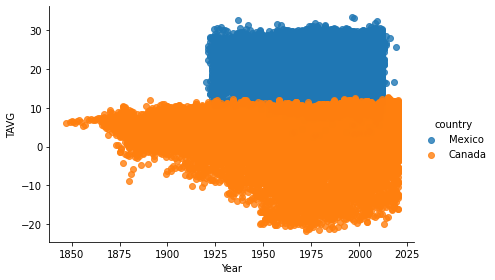

In [89]:
# Visualizing the weather data for some countries

q = """WITH temp_data AS (
       SELECT country, Year, TAVG
       FROM raw_weather_by_country_df 
       WHERE country IN ('Mexico','Canada')
       )
       SELECT *
       FROM temp_data td

       ;"""

subset_raw_weather_by_country_df = pysqldf(q)

# The plot seems to make sense: colder weather and more observations registered in Canada than in Mexico
sns.lmplot('Year', 'TAVG', data=subset_raw_weather_by_country_df, height=4, aspect=1.5, fit_reg=False, hue="country")

In [13]:
# Calculating averages at country level

q = """SELECT country, code3,Year, AVG(TAVG) AS TAVG, AVG(PRCP) AS PRCP
       FROM raw_weather_by_country_df
       GROUP BY 1,2,3
       ;"""

weather_df = pysqldf(q)
print(weather_df)


         country code3  Year       TAVG         PRCP
0         Canada   CAN  1847   6.160000   944.200000
1         Canada   CAN  1849   6.310000   932.000000
2         Canada   CAN  1850   6.600000   904.300000
3         Canada   CAN  1851   6.400000   785.600000
4         Canada   CAN  1852   6.100000  1058.300000
..           ...   ...   ...        ...          ...
902  Switzerland   CHE  2009  12.065567   689.290722
903  Switzerland   CHE  2010  11.838031   810.811399
904  Switzerland   CHE  2011  11.656373   649.683938
905  Switzerland   CHE  2012  11.426425   806.676684
906  Switzerland   CHE  2020  12.497450   850.573826

[907 rows x 5 columns]


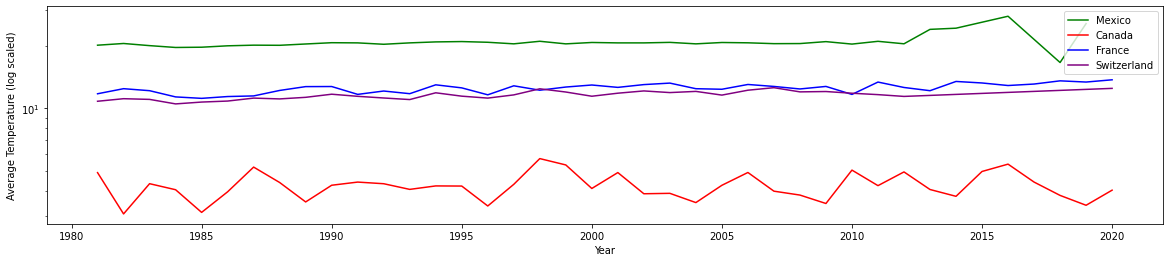

In [14]:
# Validating if global warming is observed in the data. We see at least slight increases in most countries

q = """WITH temp_data AS (
       SELECT *
       FROM weather_df 
       WHERE Year > 1980
       )
       SELECT *
       FROM temp_data td

       ;"""

subset_weather_df = pysqldf(q)

fig = plt.figure(figsize=(20, 4))
plt.plot('Year', 'TAVG', data=subset_weather_df[subset_weather_df['country'] == 'Mexico'], color='green', label="Mexico")
plt.plot('Year', 'TAVG', data=subset_weather_df[subset_weather_df['country'] == 'Canada'], color='red', label="Canada")
plt.plot('Year', 'TAVG', data=subset_weather_df[subset_weather_df['country'] == 'France'], color='blue', label="France")
plt.plot('Year', 'TAVG', data=subset_weather_df[subset_weather_df['country'] == 'Switzerland'], color='purple', label="Switzerland")
plt.legend(loc='best')

plt.ylabel('Average Temperature (log scaled)', fontsize = 10)
plt.xlabel('Year', fontsize = 10)
plt.yscale('log')

In [15]:
# Selecting a subset of columns from crops and co2 data frames
crops_df = raw_crops_df[["Entity", "Year", "wheat_attainable", "wheat_yield_gap"]]
crops_df_2 = raw_crops_df[["Entity", "Year", "maize_attainable", "maize_yield_gap"]]
co2_emissions_df = raw_co2_emissions_df

In [16]:
# Joining co2 and crops data based on country and year

q = '''SELECT 
            CAST(crop.Entity AS VARCHAR) AS country,
            CAST(co2.Code AS VARCHAR) AS code3,
            CAST(crop.Year AS INT64) AS Year,
            CAST(crop.wheat_attainable AS DOUBLE) AS wheat_attainable,
            CAST(crop.wheat_yield_gap AS DOUBLE) AS wheat_yield_gap,
            CAST(IFNULL(CAST(crop.wheat_attainable AS DOUBLE),0) - IFNULL(CAST(crop.wheat_yield_gap AS DOUBLE),0) AS DOUBLE) AS wheat_output,
            CAST(co2.co2_emissions AS DOUBLE) AS co2_emissions
           
           FROM crops_df crop
           JOIN co2_emissions_df co2 ON crop.Entity = co2.Entity AND crop.Year = co2.Year'''

consolidated_crop_co2_df = pysqldf(q)
print(consolidated_crop_co2_df)

q2 = '''SELECT 
            CAST(crop.Entity AS VARCHAR) AS country,
            CAST(co2.Code AS VARCHAR) AS code3,
            CAST(crop.Year AS INT64) AS Year,
            CAST(crop.maize_attainable AS DOUBLE) AS maize_attainable,
            CAST(crop.maize_yield_gap AS DOUBLE) AS maize_yield_gap,
            CAST(IFNULL(CAST(crop.maize_attainable AS DOUBLE),0) - IFNULL(CAST(crop.maize_yield_gap AS DOUBLE),0) AS DOUBLE) AS maize_output,
            CAST(co2.co2_emissions AS DOUBLE) AS co2_emissions
           
           FROM crops_df_2 crop
           JOIN co2_emissions_df co2 ON crop.Entity = co2.Entity AND crop.Year = co2.Year'''

consolidated_crop_co2_df_2 = pysqldf(q2)
print(consolidated_crop_co2_df_2)

          country code3  Year  ...  wheat_yield_gap  wheat_output  co2_emissions
0     Afghanistan   AFG  1961  ...             2.98          1.02       490798.0
1     Afghanistan   AFG  1962  ...             3.03          0.97       688594.0
2     Afghanistan   AFG  1963  ...             3.17          0.83       706736.0
3     Afghanistan   AFG  1964  ...             3.05          0.95       838551.0
4     Afghanistan   AFG  1965  ...             3.03          0.97      1006917.0
...           ...   ...   ...  ...              ...           ...            ...
8000     Zimbabwe   ZWE  2014  ...             2.44          2.21     11905687.0
8001     Zimbabwe   ZWE  2015  ...             2.60          2.05     12225821.0
8002     Zimbabwe   ZWE  2016  ...             2.75          1.90     10737567.0
8003     Zimbabwe   ZWE  2017  ...             2.90          1.75      9581633.0
8004     Zimbabwe   ZWE  2018  ...             2.65          2.00     11854367.0

[8005 rows x 7 columns]
   

Text(0.5, 0, 'Year')

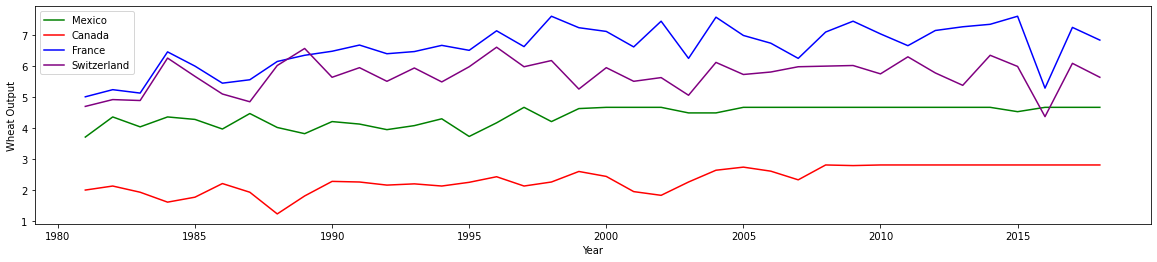

In [17]:
# Visualizing crop output data
# wheat

q = """WITH temp_data AS (
       SELECT *
       FROM consolidated_crop_co2_df 
       WHERE Year > 1980
       )
       SELECT *
       FROM temp_data td

       ;"""

subset_consolidated_df = pysqldf(q)

fig = plt.figure(figsize=(20, 4))
plt.plot('Year', 'wheat_output', data=subset_consolidated_df[subset_consolidated_df['country'] == 'Mexico'], color='green', label="Mexico")
plt.plot('Year', 'wheat_output', data=subset_consolidated_df[subset_consolidated_df['country'] == 'Canada'], color='red', label="Canada")
plt.plot('Year', 'wheat_output', data=subset_consolidated_df[subset_consolidated_df['country'] == 'France'], color='blue', label="France")
plt.plot('Year', 'wheat_output', data=subset_consolidated_df[subset_consolidated_df['country'] == 'Switzerland'], color='purple', label="Switzerland")
plt.legend(loc='best')

plt.ylabel('Wheat Output', fontsize = 10)
plt.xlabel('Year', fontsize = 10)

Text(0.5, 0, 'Year')

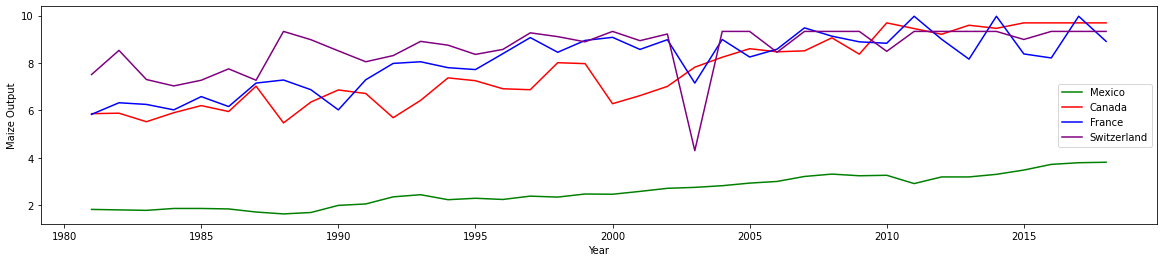

In [84]:
# Visualizing crop output data
# maize

q = """WITH temp_data AS (
       SELECT *
       FROM consolidated_crop_co2_df_2 
       WHERE Year > 1980
       )
       SELECT *
       FROM temp_data td

       ;"""

subset_consolidated_df = pysqldf(q)

fig = plt.figure(figsize=(20, 4))
plt.plot('Year', 'maize_output', data=subset_consolidated_df[subset_consolidated_df['country'] == 'Mexico'], color='green', label="Mexico")
plt.plot('Year', 'maize_output', data=subset_consolidated_df[subset_consolidated_df['country'] == 'Canada'], color='red', label="Canada")
plt.plot('Year', 'maize_output', data=subset_consolidated_df[subset_consolidated_df['country'] == 'France'], color='blue', label="France")
plt.plot('Year', 'maize_output', data=subset_consolidated_df[subset_consolidated_df['country'] == 'Switzerland'], color='purple', label="Switzerland")
plt.legend(loc='best')

plt.ylabel('Maize Output', fontsize = 10)
plt.xlabel('Year', fontsize = 10)

In [18]:
# Joining weather data into consolidated data frame

q = '''SELECT 
            c.country AS country,
            c.code3 AS code3,
            c.Year AS Year,
            wheat_attainable,
            wheat_yield_gap,
            wheat_output,
            co2_emissions,
            TAVG,
            PRCP

           FROM consolidated_crop_co2_df c
           JOIN weather_df w ON c.code3 = w.code3 AND c.Year = w.Year
           '''

consolidated_df = pysqldf(q)
consolidated_df

q2 = '''SELECT 
            c.country AS country,
            c.code3 AS code3,
            c.Year AS Year,
            maize_attainable,
            maize_yield_gap,
            maize_output,
            co2_emissions,
            TAVG,
            PRCP

           FROM consolidated_crop_co2_df_2 c
           JOIN weather_df w ON c.code3 = w.code3 AND c.Year = w.Year
           '''

consolidated_df_2 = pysqldf(q2)
consolidated_df_2

,country,code3,Year,maize_attainable,maize_yield_gap,maize_output,co2_emissions,TAVG,PRCP
0,Canada,CAN,1961,9.69,5.11,4.58,194000694.0,3.578706,812.290327
1,Canada,CAN,1962,9.69,4.92,4.77,206990771.0,3.148364,844.575897
2,Canada,CAN,1963,9.69,5.58,4.11,210910776.0,3.413782,830.111156
3,Canada,CAN,1964,9.69,4.63,5.06,237577733.0,3.070025,837.661975
4,Canada,CAN,1965,9.69,4.68,5.01,251916995.0,2.821155,811.793277
...,...,...,...,...,...,...,...,...,...
380,Switzerland,CHE,2008,9.33,0.00,9.33,44714048.0,12.019188,761.422335
381,Switzerland,CHE,2009,9.33,0.00,9.33,43534481.0,12.065567,689.290722
382,Switzerland,CHE,2010,9.33,0.84,8.49,45049377.0,11.838031,810.811399
383,Switzerland,CHE,2011,9.33,0.00,9.33,40985444.0,11.656373,649.683938


## Section 3: Modeling and Accuracy Analysis

**Part 1: Getting dataframe ready to be split into features and labels for maching learning**

In [65]:
#Drop columns that are not needed
consolidated_lean_df = consolidated_df.drop(['code3','wheat_attainable','wheat_yield_gap'], axis = 1)
consolidated_lean_df

consolidated_lean_df_2 = consolidated_df_2.drop(['code3','maize_attainable','maize_yield_gap'], axis = 1)
consolidated_lean_df_2

,country,Year,maize_output,co2_emissions,TAVG,PRCP
0,Canada,1961,4.58,194000694.0,3.578706,812.290327
1,Canada,1962,4.77,206990771.0,3.148364,844.575897
2,Canada,1963,4.11,210910776.0,3.413782,830.111156
3,Canada,1964,5.06,237577733.0,3.070025,837.661975
4,Canada,1965,5.01,251916995.0,2.821155,811.793277
...,...,...,...,...,...,...
380,Switzerland,2008,9.33,44714048.0,12.019188,761.422335
381,Switzerland,2009,9.33,43534481.0,12.065567,689.290722
382,Switzerland,2010,8.49,45049377.0,11.838031,810.811399
383,Switzerland,2011,9.33,40985444.0,11.656373,649.683938


In [66]:
#Create one hot vectors for categorical data
consolidated_lean_df.country = consolidated_lean_df.country.astype('category')
consolidated_lean_df.Year = consolidated_lean_df.country.astype('category')

consolidated_lean_df = pd.get_dummies(consolidated_lean_df, columns=['country', 'Year'])
consolidated_lean_df

consolidated_lean_df_2.country = consolidated_lean_df_2.country.astype('category')
consolidated_lean_df_2.Year = consolidated_lean_df_2.country.astype('category')

consolidated_lean_df_2 = pd.get_dummies(consolidated_lean_df_2, columns=['country', 'Year'])
consolidated_lean_df_2

,maize_output,co2_emissions,TAVG,PRCP,country_Canada,country_Croatia,country_Egypt,country_France,country_Mexico,country_Netherlands,country_New Zealand,country_Romania,country_Switzerland,Year_Canada,Year_Croatia,Year_Egypt,Year_France,Year_Mexico,Year_Netherlands,Year_New Zealand,Year_Romania,Year_Switzerland
0,4.58,194000694.0,3.578706,812.290327,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,4.77,206990771.0,3.148364,844.575897,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,4.11,210910776.0,3.413782,830.111156,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,5.06,237577733.0,3.070025,837.661975,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5.01,251916995.0,2.821155,811.793277,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,9.33,44714048.0,12.019188,761.422335,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
381,9.33,43534481.0,12.065567,689.290722,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
382,8.49,45049377.0,11.838031,810.811399,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
383,9.33,40985444.0,11.656373,649.683938,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [68]:
#Create features and labels

features = consolidated_lean_df.drop(['wheat_output'], axis = 1)
label = consolidated_lean_df['wheat_output']

features_2 = consolidated_lean_df_2.drop(['maize_output'], axis = 1)
label_2 = consolidated_lean_df_2['maize_output']

**Part 2: Now, we are ready to complete pre-processing steps of standardizing the features and running PCA.**

In [69]:
#Standardize the features
features_std = StandardScaler().fit_transform(features)
features_std

features_std_2 = StandardScaler().fit_transform(features_2)
features_std_2

array([[-1.76662486e-01, -1.57897458e+00,  1.20757360e-01, ...,
        -1.14707867e-01, -4.21153215e-01, -3.95165986e-01],
       [-1.02294298e-01, -1.66111987e+00,  2.71291496e-01, ...,
        -1.14707867e-01, -4.21153215e-01, -3.95165986e-01],
       [-7.98522699e-02, -1.61045583e+00,  2.03848449e-01, ...,
        -1.14707867e-01, -4.21153215e-01, -3.95165986e-01],
       ...,
       [-1.02940875e+00, -2.40112760e-03,  1.13861736e-01, ...,
        -1.14707867e-01, -4.21153215e-01,  2.53058218e+00],
       [-1.05267477e+00, -3.70767478e-02, -6.37408361e-01, ...,
        -1.14707867e-01, -4.21153215e-01,  2.53058218e+00],
       [-1.04540866e+00, -8.09701883e-02,  9.45832855e-02, ...,
        -1.14707867e-01, -4.21153215e-01,  2.53058218e+00]])

In [70]:
#Split into train and test datasets
#wheat
x = features_std
y = np.array(label)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

#maize
x_2 = features_std_2
y_2 = np.array(label_2)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.20)

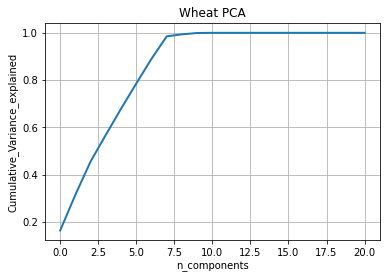

In [71]:
#Run PCA to reduce dimensionality
pca = PCA(n_components=len(features.columns))
pca.fit(x_train)

percentage_var_explained = pca.explained_variance_ratio_  
cum_var_explained=np.cumsum(percentage_var_explained)
  
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.title('Wheat PCA')
plt.show()


#We learn that about 7 components are enough for wheat

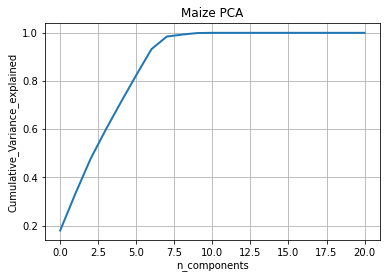

In [72]:
#Run PCA to reduce dimensionality
pca = PCA(n_components=len(features_2.columns))
pca.fit(x_train_2)

percentage_var_explained = pca.explained_variance_ratio_  
cum_var_explained=np.cumsum(percentage_var_explained)
  
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.title('Maize PCA')
plt.show()


#We learn that about 7 components are enough for maize

In [73]:
#Now apply what we learned from PCA to train and test sets 
#wheat
pca = PCA(n_components=7)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

#maize
pca = PCA(n_components=7)
x_train_2 = pca.fit_transform(x_train_2)
x_test_2 = pca.transform(x_test_2)

**Part 3: Building and evaluating linear regression and random forest models**

In [74]:
#Linear Regression
#wheat
model = LinearRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test,y_pred)

print("Mean Squared Error: %.2f" %mse_test)
print("Coefficient of Determination: %.2f" %r2_test)

Mean Squared Error: 1.32
Coefficient of Determination: 0.72


In [75]:
#Tuning parameters using GridSearch and Random Forest as the estimator
#wheat
rfr = RandomForestRegressor()
params = {'max_depth': [25,40,52,65,75],'n_estimators': [10,30,50,100,150]}

search = GridSearchCV(estimator=rfr,param_grid = params, n_jobs = -1)
search.fit(x_train,y_train)
search.cv_results_
search.best_params_

{'max_depth': 25, 'n_estimators': 10}

In [76]:
#Running Random Forest Regression
#wheat
rfr = RandomForestRegressor(n_estimators=10,max_depth=25)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test,y_pred)

print("Mean Squared Error: %.2f" %mse_test)
print("Coefficient of Determination: %.2f" %r2_test)

Mean Squared Error: 0.50
Coefficient of Determination: 0.90


In [77]:
#Linear Regression
#maize
model = LinearRegression().fit(x_train_2,y_train_2)
y_pred_2 = model.predict(x_test_2)

mse_test = mean_squared_error(y_test_2,y_pred_2)
r2_test = r2_score(y_test_2,y_pred_2)

print("Mean Squared Error: %.2f" %mse_test)
print("Coefficient of Determination: %.2f" %r2_test)

Mean Squared Error: 2.75
Coefficient of Determination: 0.69


In [78]:
#Tuning parameters using GridSearch and Random Forest as the estimator
#maize
rfr = RandomForestRegressor()
params = {'max_depth': [25,40,52,65,75],'n_estimators': [10,30,50,100,150]}

search = GridSearchCV(estimator=rfr,param_grid = params, n_jobs = -1)
search.fit(x_train_2,y_train_2)
search.cv_results_
search.best_params_

{'max_depth': 40, 'n_estimators': 100}

In [79]:
#Running Random Forest Regression
#maize
rfr = RandomForestRegressor(n_estimators=100,max_depth=40)
rfr.fit(x_train_2,y_train_2)
y_pred_2 = rfr.predict(x_test_2)

mse_test = mean_squared_error(y_test_2,y_pred_2)
r2_test = r2_score(y_test_2,y_pred_2)

print("Mean Squared Error: %.2f" %mse_test)
print("Coefficient of Determination: %.2f" %r2_test)

Mean Squared Error: 1.23
Coefficient of Determination: 0.86


In the last run before turning in the project, we can see by using random forest regression vs linear regression, 

*   For wheat: we can reduce the MSE from 1.32 to 0.50 and increasing the r2 score from 0.72 to 0.90
*   For maize: we can reduce the MSE from 2.75 to 1.23 and increasing the r2 score from 0.69 to 0.86
